In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells/500_sub'
counts_csv = '20200521_maternal500wo_outliers_counts_per_sample_meta_clust.csv'
counts_filepath = os.path.join(subsample_path, counts_csv)
cell_counts = pd.read_csv(counts_filepath)  

In [5]:
cell_counts['cell_type_v2'].unique()

array(['B cells', 'Basophils', 'CD4+ T cells', 'CD8+ T cells',
       'Eosinophils', 'Monocytes', 'NK cells', 'Neutrophils'],
      dtype=object)

In [9]:
cell_list = cell_counts['cell_type_v2'].unique().tolist()

In [6]:
cell_counts.columns

Index(['cell_type_v2', 'compartment', 'organ', 'location', 'day', 'challenge',
       'timePI', 'cage', 'id', 'test_status', 'counts', 'sample',
       'sample_total', 'frac_of_comp_sample', 'compartment2'],
      dtype='object')

In [7]:
counts_piv = cell_counts.pivot_table(index = ['compartment2', 'day', 'cage', 'id', 
                                                    'test_status'], columns = 'cell_type_v2', 
                                     values = 'frac_of_comp_sample')
counts_piv.reset_index(inplace = True)

In [24]:
counts_piv['test_status'].unique()

array(['test'], dtype=object)

In [10]:
counts_piv.loc[:,cell_list] = counts_piv.loc[:,cell_list].fillna(0)
counts_piv.loc[:, 'cage'] = counts_piv.loc[:, 'cage'].astype('category')

In [11]:
composite = counts_piv.groupby(['compartment2']).agg(['mean', 'sem'])

In [13]:
composite.head(5)

B cells           Basophils           CD4+ T cells            \
                  mean       sem      mean       sem         mean       sem   
compartment2                                                                  
PB-EV         0.351731  0.016497  0.011579  0.001822     0.074533  0.005633   
PL-EV         0.202799  0.015111  0.005934  0.001414     0.038061  0.003558   
PL-T          0.070362  0.008278  0.035742  0.003678     0.021685  0.002516   

             CD8+ T cells           Eosinophils           Monocytes            \
                     mean       sem        mean       sem      mean       sem   
compartment2                                                                    
PB-EV            0.066053  0.004336    0.007761  0.002172  0.099431  0.008405   
PL-EV            0.027840  0.002792    0.012378  0.001863  0.474100  0.024831   
PL-T             0.017746  0.002225    0.022300  0.001964  0.373882  0.014818   

              NK cells           Neutrophils            
                  mean       sem        mean       sem  
compartment2                                            
PB-EV         0.252310  0.015982    0.136602  0.010384  
PL-EV         0.049825  0.005293    0.170715  0.017481  
PL-T          0.078391  0.006111    0.361923  0.016448

In [14]:
mean_sem_comp = composite.reorder_levels([1, 0], axis = 1) 

In [15]:
mean_sem_comp['mean']

,B cells,Basophils,CD4+ T cells,CD8+ T cells,Eosinophils,Monocytes,NK cells,Neutrophils
compartment2,,,,,,,,
PB-EV,0.351731,0.011579,0.074533,0.066053,0.007761,0.099431,0.252310,0.136602
PL-EV,0.202799,0.005934,0.038061,0.027840,0.012378,0.474100,0.049825,0.170715
PL-T,0.070362,0.035742,0.021685,0.017746,0.022300,0.373882,0.078391,0.361923


In [16]:
mean_sem_comp.sort_index(axis = 0, ascending = False, inplace = True)
composite_T = mean_sem_comp['mean'].transpose()
composite_T.reset_index(inplace = True)
composite_T.sum(axis = 0)
int_to_cell = composite_T[['index']].to_dict()

In [17]:
composite_T.head(5)

compartment2,index,PL-T,PL-EV,PB-EV
0,B cells,0.070362,0.202799,0.351731
1,Basophils,0.035742,0.005934,0.011579
2,CD4+ T cells,0.021685,0.038061,0.074533
3,CD8+ T cells,0.017746,0.027840,0.066053
4,Eosinophils,0.022300,0.012378,0.007761


In [18]:
int_to_cell

{'index': {0: 'B cells',
  1: 'Basophils',
  2: 'CD4+ T cells',
  3: 'CD8+ T cells',
  4: 'Eosinophils',
  5: 'Monocytes',
  6: 'NK cells',
  7: 'Neutrophils'}}

In [20]:
bars_dict = {}
for cell_id in composite_T.index:
    bars_dict[cell_id] = composite_T.iloc[cell_id, 1:]
height_dict = {}
for cell_id in composite_T.index:
    height_dict[cell_id] = composite_T.iloc[cell_id+1:,1:].sum().tolist()

In [22]:
cell_color_dict = {'B cells': '#FFFF00',
 'CD4+ T cells': '#FF34FF',
 'CD8+ T cells': '#FF4A46',
 'Eosinophils': '#A30059',
 'Basophils': '#b98cdb',
 'Monocytes': '#552de3',
 'NK cells': '#8FB0FF',
 'Neutrophils': '#8393a3',                   
 'DCs': '#1CE6FF'}

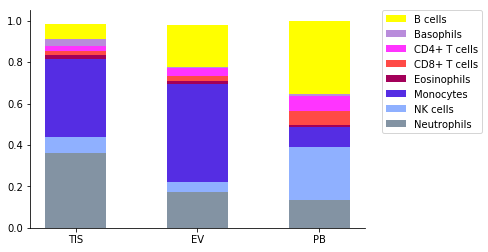

In [23]:
# The position of the bars on the x-axis
r = [0,0.2,0.4]
 
# Names of group and bar width
names = ['TIS','EV','PB']
barWidth = 0.10

for cell_id in composite_T.index:
    plt.bar(r, bars_dict[cell_id], color = cell_color_dict[int_to_cell['index'][cell_id]], bottom = height_dict[cell_id], width=barWidth, linewidth = 0)
plt.xticks(r, names);
plt.legend(composite_T['index'], bbox_to_anchor=(1.05, 1), loc='upper left', 
               borderaxespad=0., ncol=1)
sns.despine(right = True, top = True)